In [10]:
from axicon import smoothed_axcion_sag
import numpy as np
import matplotlib.pyplot as plt

In [11]:
axiconDiameter=1.1
axiconHeight=2.5/1000
axiconRadius=107.4545
baseRadius=236.4 
fillet_width=0.1
lensSemiDiameter=5
fullSemiDiameter=6.5
delta_x=0.0025
lens_thickness=1.5


In [12]:
def z(r,R,Q):
    return (1/R)*r**2/(1+np.sqrt(1-(1+Q**2)*(1/R)**2*r**2))
def horizontal_line(r, y):
    return np.full_like(r, y)
def y_continuous(x, f_list):
    # 分段函数，由f_list中的函数组成，每个函数对应一个区间
    # f_list中的每个元素是一个三元组，分别是函数、函数参数、函数作用区间
    #     f_list = [
    #     (f1, (1, 2), (0, 1)),      # 使用f1函数在0 <= x < 1
    #     (f2, (1, -1, 1), (1, 2)),  # 使用f2函数在1 <= x < 2
    #     (f3, (2,), (2, 4))         # 使用f3函数在2 <= x < 4
    # ]

    # 存储每个分段的y值
    segments_y = []
    
    # 上一个分段的最后一个y值，用于计算偏移量
    last_y = 0

    for (func, args, x_range) in f_list:
        # 计算当前分段的x值
        segment_x = x[(x_range[0] <= x) & (x < x_range[1])]

        # 计算当前分段的y值
        segment_y = func(segment_x, *args)

        # 如果不是第一个分段，计算偏移量并应用
        if segments_y:
            # 计算需要的偏移量使得当前分段的起始点与上一个分段的终点对齐
            offset = last_y - segment_y[0]
            offset += (segment_y[1]-segment_y[0])
            segment_y += offset
            # print(f"offset={offset}")
            # print(f"last_y={last_y}")
            # print(f"segment_y[0]={segment_y[0]}")
            # print(f"segment_y[1]={segment_y[1]}")

        # 更新上一个分段的最后一个y值
        last_y = segment_y[-1] if len(segment_y) > 0 else last_y

        # 将当前分段的y值添加到列表中
        segments_y.append(segment_y)

    # 重复最后一个数字，添加到segments_y结尾
    segments_y=np.concatenate(segments_y)
    if len(segments_y)<len(x):
        segments_y=np.append(segments_y,segments_y[-1])
    # 将所有分段的y值合并成一个数组
    return segments_y

In [13]:
function_list=[
    (smoothed_axcion_sag, (axiconDiameter, axiconHeight, axiconRadius,baseRadius,fillet_width), (0, axiconDiameter/2)),
    (z,(baseRadius,0),(axiconDiameter/2,lensSemiDiameter)),
    (horizontal_line,(0,),(lensSemiDiameter,fullSemiDiameter))
]
function_list_without_smooth=[
    (smoothed_axcion_sag, (axiconDiameter, axiconHeight, axiconRadius,baseRadius,0.01), (0, axiconDiameter/2)),
    (z,(baseRadius,0),(axiconDiameter/2,lensSemiDiameter)),
    (horizontal_line,(0,),(lensSemiDiameter,fullSemiDiameter))
]

c:\Users\goldengrape\miniconda3\envs\zemax\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


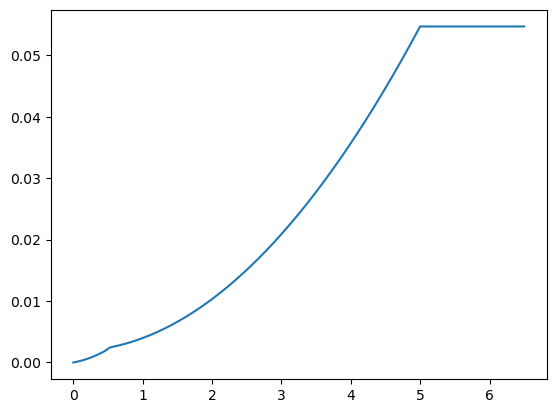

In [14]:
x=np.arange(0,fullSemiDiameter,delta_x)
z=y_continuous(x,function_list)
z_without_smooth=y_continuous(x,function_list_without_smooth)
# 反向排列x,z
x=x[::-1]
z=z[::-1]
z_without_smooth=z_without_smooth[::-1]
plt.plot(x,z)
plt.show()

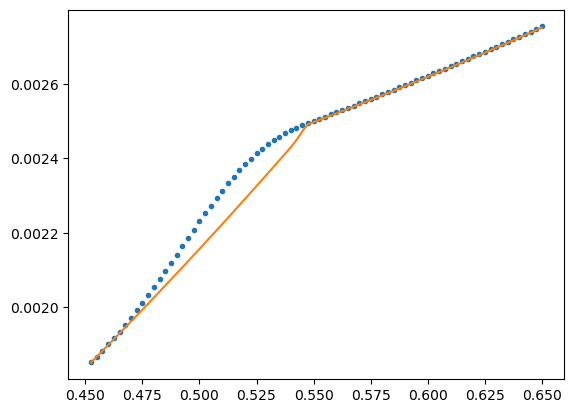

In [15]:
# 显示 0.4<=r<=0.6 的部分
mask=(axiconDiameter/2-0.1<=x)&(x<=axiconDiameter/2+0.1)
plt.plot(x[mask],z[mask],'.')
plt.plot(x[mask],z_without_smooth[mask])
plt.show()

In [16]:
from parse_JFL import *

In [17]:
filename="axicon_smooth.JFL"
filename_without_smooth='axicon_wihout_smooth.JFL'

In [18]:
segments={"F":
          np.array([x,z]).T,
          "B":
          np.array([x,np.full_like(x,lens_thickness)]).T,
          }
save_jfl_file(segments, filename)
segments_without_smooth={"F":
          np.array([x,z_without_smooth]).T,
          "B":
          np.array([x,np.full_like(x,lens_thickness)]).T,
          }
save_jfl_file(segments_without_smooth,filename_without_smooth)

File saved successfully to axicon_smooth.JFL
File saved successfully to axicon_wihout_smooth.JFL
